<a href="https://colab.research.google.com/github/tincorpai/Recommendation-System/blob/master/Recommendation_system_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
os.chdir('/content/drive/Shared drives/machinelearning/deep_learning_with_python/recommendation_python')

In [ ]:
data = pd.read_csv("Datasets_2/rating.csv" , usecols=['userId', 'movieId', 'rating'])

In [ ]:
data.columns, data.shape

(Index(['userId', 'movieId', 'rating'], dtype='object'), (20000263, 3))

In [ ]:
df = data[0:100000]

In [ ]:
movie_title = pd.read_csv("Datasets_2/movie.csv")
movie_title.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
df2 = pd.merge(df, movie_title, on = 'movieId')

In [ ]:
df2.shape

(100000, 5)

In [ ]:
df2.head(2)

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
#We have to group_by titleand count the rating
movie_rating_count = df2.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'TotalRatingCount'})
movie_rating_count

,title,TotalRatingCount
0,'Hellboy': The Seeds of Creation (2004),1
1,'Neath the Arizona Skies (1934),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",14
...,...,...
8220,"\\""Great Performances\""\"" Cats (1998)""",1
8221,eXistenZ (1999),35
8222,xXx (2002),22
8223,xXx: State of the Union (2005),4


In [ ]:
final=df2.merge(movie_rating_count, on='title', how='left')
final.head(3)

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112


In [ ]:
#We export our dataset into a new csv file
final.to_csv('/content/drive/Shared drives/machinelearning/deep_learning_with_python/recommendation_python/data_clean.csv')

## Pick our threshold value

<Axes: >

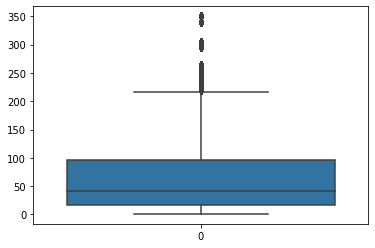

In [ ]:
sns.boxplot(final['TotalRatingCount'])

In [ ]:
final['TotalRatingCount'].quantile(0.1)

5.0

In [ ]:
for i in range(0, 100, 10):
  print('{}th percentile value is {}'.format(i, final['TotalRatingCount'].quantile(i/100)))

0th percentile value is 1.0
10th percentile value is 5.0
20th percentile value is 11.0
30th percentile value is 20.0
40th percentile value is 29.0
50th percentile value is 42.0
60th percentile value is 61.0
70th percentile value is 80.0
80th percentile value is 112.0
90th percentile value is 164.0


## Using the Pivot Table

The following code returns observations where total rating is greater than 61

In [ ]:
final[final['TotalRatingCount']>61]

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [ ]:
#We querry the dataset at threshold greater or equal to 61
threshold=61
rating_popular_movie = final.query('TotalRatingCount >@threshold')

### Pivot table is typically used when you want to understand more about data

In [ ]:
rating_popular_movie.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'TotalRatingCount'], dtype='object')

In [ ]:
moviemat = rating_popular_movie.pivot_table(index='userId', columns = 'title', values = "rating")
moviemat.head()

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [ ]:
moviemat.shape

(697, 357)

In [ ]:
similarity = moviemat.corrwith(moviemat['Airplane! (1980)'])
similarity.sort_values(ascending=False)

title
Airplane! (1980)                                        1.000000
Casper (1995)                                           0.680396
Galaxy Quest (1999)                                     0.661684
Bridge on the River Kwai, The (1957)                    0.629462
Santa Clause, The (1994)                                0.603553
                                                          ...   
Crying Game, The (1992)                                -0.301612
Desperado (1995)                                       -0.330267
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)   -0.349704
Mr. Holland's Opus (1995)                              -0.357667
As Good as It Gets (1997)                              -0.402779
Length: 357, dtype: float64

This means this the top five movies a user might get if he or she is watching Airplane 1980 movie.

In [ ]:
#reset the dataset to dataframe 
co_Reln = similarity.sort_values(ascending=False).reset_index().rename(columns={0:'co-reln values'})

In [ ]:
co_Reln

,title,co-reln values
0,Airplane! (1980),1.000000
1,Casper (1995),0.680396
2,Galaxy Quest (1999),0.661684
3,"Bridge on the River Kwai, The (1957)",0.629462
4,"Santa Clause, The (1994)",0.603553
...,...,...
352,"Crying Game, The (1992)",-0.301612
353,Desperado (1995),-0.330267
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704
355,Mr. Holland's Opus (1995),-0.357667


In [ ]:
rating_popular_movie

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [ ]:
rate = rating_popular_movie.groupby('title').agg({'title': 'count', 'rating': 'mean'}).rename(columns={'title':'total_ratings', 'rating':'avg_rating'}).reset_index()

In [ ]:
rate

,title,total_ratings,avg_rating
0,12 Angry Men (1957),73,4.164384
1,2001: A Space Odyssey (1968),128,4.003906
2,A.I. Artificial Intelligence (2001),63,3.111111
3,"Abyss, The (1989)",89,3.494382
4,Ace Ventura: Pet Detective (1994),193,2.891192
...,...,...,...
352,Willy Wonka & the Chocolate Factory (1971),139,3.744604
353,"Wizard of Oz, The (1939)",117,3.944444
354,X-Men (2000),132,3.621212
355,X2: X-Men United (2003),76,3.664474


In [ ]:
cor =co_Reln.merge(rate, on='title')

In [ ]:
cor

,title,co-reln values,total_ratings,avg_rating
0,Airplane! (1980),1.000000,84,3.666667
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
...,...,...,...,...
352,"Crying Game, The (1992)",-0.301612,62,3.782258
353,Desperado (1995),-0.330267,80,3.262500
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704,128,4.273438
355,Mr. Holland's Opus (1995),-0.357667,100,3.815000


In [ ]:
cor.sort_values('co-reln values', ascending=False)[1:11]

,title,co-reln values,total_ratings,avg_rating
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
5,Unforgiven (1992),0.602800,79,3.791139
6,Tomorrow Never Dies (1997),0.602446,71,3.267606
7,Monty Python and the Holy Grail (1975),0.601236,166,4.186747
8,"Terminator, The (1984)",0.580656,160,3.912500
9,Coneheads (1993),0.556090,85,2.882353
10,Chicken Run (2000),0.544424,76,3.322368


## Let's automate all what we have been doing

In [ ]:
def recommend_movies(movie):
  similarity=moviemat.corrwith(moviemat[movie])
  return similarity.sort_values(ascending=False)

In [ ]:
recommend_movies('Casper (1995)')[1:11]

title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.880848
Pleasantville (1998)                                                                              0.866816
Notting Hill (1999)                                                                               0.802955
Talented Mr. Ripley, The (1999)                                                                   0.799671
City of God (Cidade de Deus) (2002)                                                               0.798554
Little Mermaid, The (1989)                                                                        0.794992
Naked Gun 33 1/3: The Final Insult (1994)                                                         0.781180
Last Action Hero (1993)                                                                           0.776395
Big (1988)                                                                                        0.770552
Beetlejuice (1988)             